Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:09<00:00, 1024646.98it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|███████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 415838.02it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 1620947.25it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 3987134.53it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/20 - Train Loss: 0.3607 - Val Loss: 0.1896 - Val Accuracy: 94.12%
Epoch 2/20 - Train Loss: 0.1627 - Val Loss: 0.1211 - Val Accuracy: 96.22%
Epoch 3/20 - Train Loss: 0.1174 - Val Loss: 0.1197 - Val Accuracy: 96.38%
Epoch 4/20 - Train Loss: 0.0967 - Val Loss: 0.1347 - Val Accuracy: 96.04%
Epoch 5/20 - Train Loss: 0.0810 - Val Loss: 0.0865 - Val Accuracy: 97.41%
Epoch 6/20 - Train Loss: 0.0695 - Val Loss: 0.0912 - Val Accuracy: 97.39%
Epoch 7/20 - Train Loss: 0.0653 - Val Loss: 0.0977 - Val Accuracy: 97.11%
Epoch 8/20 - Train Loss: 0.0566 - Val Loss: 0.0944 - Val Accuracy: 97.39%
Epoch 9/20 - Train Loss: 0.0502 - Val Loss: 0.0944 - Val Accuracy: 97.27%
Epoch 10/20 - Train Loss: 0.0461 - Val Loss: 0.1025 - Val Accuracy: 96.91%
Epoch 11/20 - Train Loss: 0.0402 - Val Loss: 0.1109 - Val Accuracy: 97.07%
Epoch 12/20 - Train Loss: 0.0393 - Val Loss: 0.0857 - Val Accuracy: 97.69%
Epoch 13/20 - Train Loss: 0.0379 -

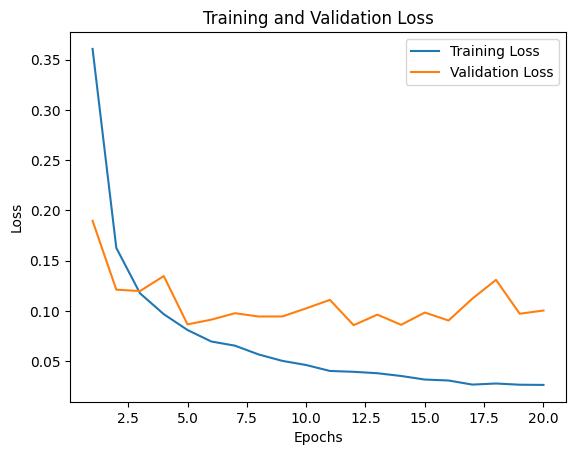

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define dataset and transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Split dataset into train and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Define a simple fully connected neural network
class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Instantiate model, loss function, and optimizer
model = FCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with validation
n_epochs = 20
train_losses, val_losses = [], []

for epoch in range(1, n_epochs + 1):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)
    accuracy = 100. * correct / len(val_loader.dataset)

    print(f"Epoch {epoch}/{n_epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f} - Val Accuracy: {accuracy:.2f}%")

# Plot train and validation loss
import matplotlib.pyplot as plt

plt.plot(range(1, n_epochs + 1), train_losses, label="Training Loss")
plt.plot(range(1, n_epochs + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()
